## Bayesian structural geological modelling: a simple example

The purpose of the modules provided in this directory is to show a simple application of bayesian structural geological modelling. The model setup is very simple and based on a completely explicit modelling approach: a lot simpler than anything possible with modern Geomodelling packages. However, as these packages not available to everyone, this example is included to show the underlying concepts.

In [2]:
import sys


In [3]:
%matplotlib inline

In [4]:
sys.path.append("C:\Users\Miguel\workspace\Thesis\geobyes")

In [12]:
import geobayes_simple as gs
from matplotlib import pyplot as plt

We will here first show the steps to create a simple (single) geological model realisation, to change some parameters, and to visualise the model in a 2-D section.

A model is defined with the following information:
<ul>
<li>Position of faults (x,z)
<li>Dip of the faults (angle to surface)
<li>One point for the top surface of each sedimentary layer in each fault compartment (x,z)
<li>The dip of the sedimentary pile, assumed to be constant everywhere (angle to surface)
</ul>
These parameters are defined in a dictionary which is then passed to the model object to construct the model:

In [169]:
model_parameters = {'faults' : {'fault_w_pos' : (400.,0.),
                                'fault_w_dip' : 70.,
                                'fault_e_pos' : (1500.,0.),
                                'fault_e_dip' : -70.},
                    'layers' : {3 : {'w' :(1500., -100.),
                                             'c' : (1000., -400.),
                                             'e' : (1750., -200.)},
                                2 : {'w' :(250., -400.),
                                             'c' : (1000., -650.),
                                             'e' : (1750., -400.)},
                                1 : {'w' :(250., -600.),
                                             'c' : (1000., -800.),
                                             'e' : (1750., -600.)}},
                    'layer_dip' : 0.,
                    'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                    'width' : 2000., # [m]
                    'height' : 1000. # [m]
                    }

This dictionary is passed to the class to initialise the model:

In [170]:
reload(gs)

GM = gs.GrabenModel(model_parameters)

A 2-D visualisation of the model points and the explicitely defined surfaces can be generated with:

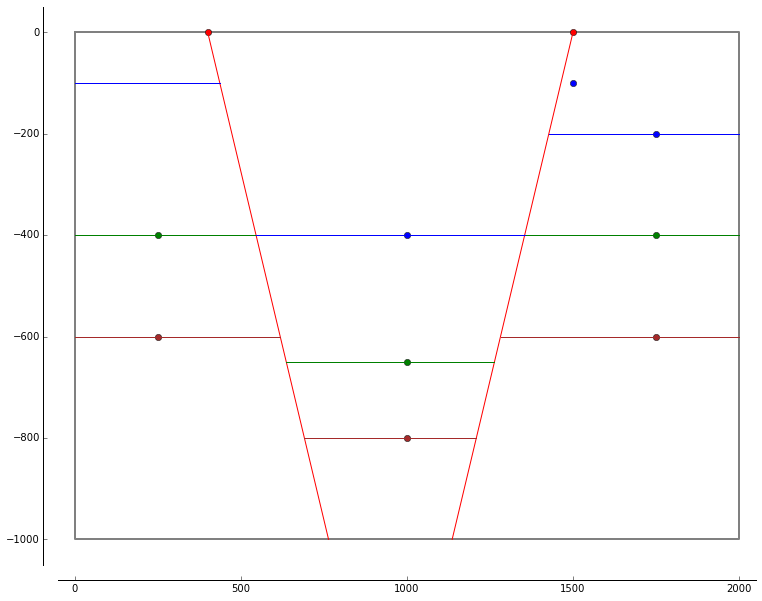

In [171]:
GM.plot_model()

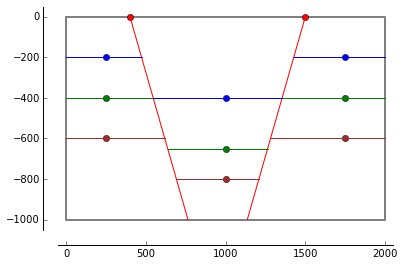

In [11]:
GM.mp['fault_e_dip'] = -80
GM.plot_model()

In [8]:
reload(gs)
l = gs.Geol_Line(10,-30,40)
l2 = gs.Geol_Line(20,-60,10)

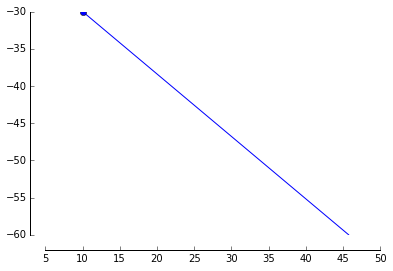

In [9]:
l.plot(z_range = (-30,-60), color = 'b')

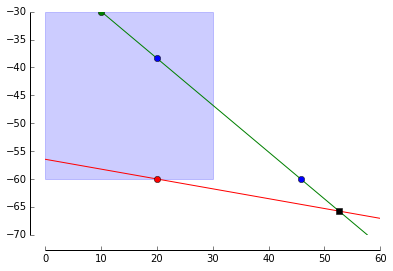

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
l.plot(z_range = (-30,-70), ax=ax, color = 'g')
l2.plot(x_range = (0,60), ax=ax, color = 'r')
# plot one point on line, given x or z value
ax.plot(l.coords_x(20)[0], l.coords_x(20)[1], 'bo')
ax.plot(l.coords_z(-60)[0], l.coords_z(-60)[1], 'bo')
# plot point at line intersection
inter_coords = gs.find_line_intersection(l, l2)
ax.plot(inter_coords[0], inter_coords[1], 'ks')
ax.add_patch(Polygon([[0,-30],[30,-30],[30,-60],[0,-60]], closed=True,
                      fill=True, color = 'Blue', alpha = 0.2))

In [14]:
# test line segments
reload(gs)
l = gs.Geol_Line(10,-30,40)
ls = gs.Geol_Line_Segment(l, 0, 30, color = 'r', linestyle = '-')

(-51.781992623545605, -16.609003688227197)

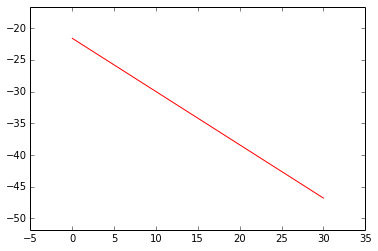

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ls.plot(ax=ax)
ax.set_xlim([ls.coords[0,0] - 5, ls.coords[1,0] + 5])
ax.set_ylim([ls.coords[1,1] - 5, ls.coords[0,1] + 5])


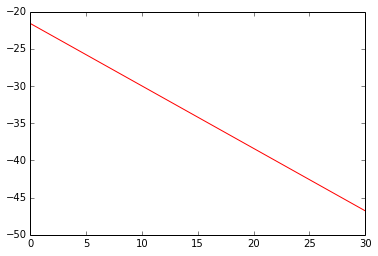

In [16]:
ls.plot()

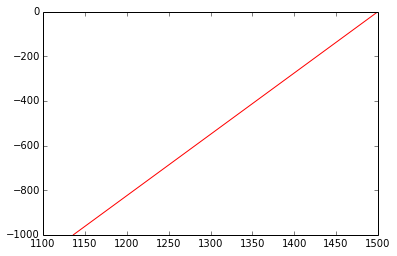

In [17]:
GM.faults['fault_e'].plot()

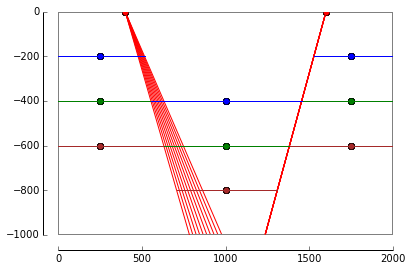

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(10):
    
    model_parameters = {'faults' : {'fault_w_pos' : (400,0.),
                                    'fault_w_dip' : 60 + i,
                                    'fault_e_pos' : (1600.,0.),
                                    'fault_e_dip' : -70.},
                        'layers' : {3 : {'w' :(250., -200.),
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., -200.)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., -400.)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., -600.)}},
                        'layer_dip' : 0.,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax)
plt.show()

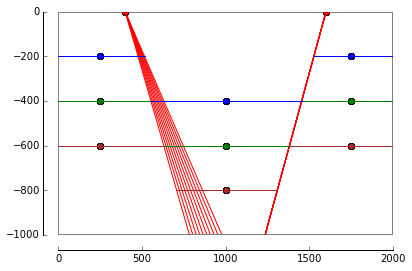

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(10):

    model_parameters = {'faults' : {'fault_w_pos' : (400,0.),
                                    'fault_w_dip' : 60 + i,
                                    'fault_e_pos' : (1600.,0.),
                                    'fault_e_dip' : -70.},
                        'layers' : {3 : {'w' :(250., -200.),
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., -200.)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., -400.)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., -600.)}},
                        'layer_dip' : 0.,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax)
plt.show()

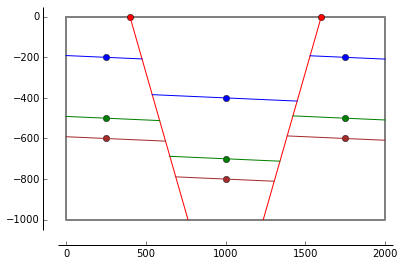

In [20]:

GM = gs.GrabenModel(model_parameters)
GM.plot_model()

In [1]:
?? np.linalg.pinv

###My stuff

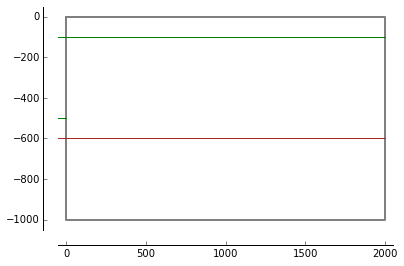

In [5]:
model_parameters = {'faults' : {'fault_w_pos' : (0.,0.),
                                'fault_w_dip' : 0,
                                'fault_e_pos' : (0.,0.),
                                'fault_e_dip' : 0.},
                    'layers' : {
                                2 : {'w' :(250., -500.),
                                             'c' : (1000., -500.),
                                             'e' : (1750., -100.)},
                                1 : {'w' :(250., -600.),
                                             'c' : (1000., -600.),
                                             'e' : (1750., -600.)}},
                    'layer_dip' : 0.00001,
                    'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                    'width' : 2000., # [m]
                    'height' : 1000. # [m]
                    }
GM = gs.GrabenModel(model_parameters)
GM.plot_model(plot_faults= False, plot_points= False)


### Simulation without thickness of the layer!!

In [ ]:
samples = [beta.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

In [108]:
M = pm.MCMC(model)
M.sample(iter=10000, burn=1000)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.5 sec

In [16]:
# Mysterious code to be explained in Chapter 3.
mcmc = pm.MCMC(model)
mcmc.sample(11000, 10000, 1)

 [-----------------100%-----------------] 11000 of 11000 complete in 1.7 sec

In [17]:
gamma_samples = mcmc.trace('gamma_original')[:]
alpha_samples = mcmc.trace('alpha')[:]
beta_samples = mcmc.trace('beta_original')[:]
parameters = zip(alpha_samples, beta_samples, gamma_samples)

KeyError: 'gamma_original'

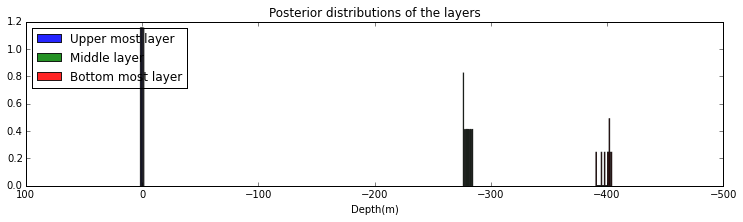

In [15]:
from IPython.core.pylabtools import figsize
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(True)

plt.hist(alpha_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Upper most layer", normed=True)
plt.hist(beta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Middle layer", normed=True)
plt.hist(gamma_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Bottom most layer", normed=True)


plt.gca().invert_xaxis()
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the layers""")
#plt.ylim([0, 0.1])
plt.xlabel("Depth(m)")

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([0,2000])
for alpha, beta, gamma in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (0,0.),
                                    'fault_w_dip' : 0,
                                    'fault_e_pos' : (0.,0.),
                                    'fault_e_dip' : 0.},
                        'layers' : {3 : {'w' :(250., -200.),
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : 0.000001,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax, plot_faults= False, plot_points= False, alpha = 0.3) # Need to make it transparent!!!

NameError: name 'plt' is not defined

In [ ]:
from pymc.Matplot import plot
plot(M)


### Simulation counting the layer!!

In [30]:
import pymc as pm



# notice the`value` here. We explain why below.
#just to make the comparison without taking in account thickness of the layers


alpha = pm.Normal("alpha", -200, 0.5, value= 5)
thickness_layer1 = pm.Normal("thickness_layer1", 300, 0.5, value = 0)
thickness_layer2 = pm.Normal("thickness_layer2", 120, 0.5, value = 0)



@pm.deterministic
def beta2(value = -500, alpha = alpha, thickness_layer1 = thickness_layer1):
    return alpha - thickness_layer1



@pm.deterministic
def gamma2(beta = beta, thickness_layer2 = thickness_layer2):
    return beta - thickness_layer2



model = pm.Model([alpha, beta2, gamma2])



In [31]:
mcmc = pm.MCMC(model)
mcmc.sample(11000, 10000, 1)

 [-----------------100%-----------------] 11000 of 11000 complete in 0.7 sec

In [32]:
gamma_samples = mcmc.trace('gamma2')[:]
alpha_samples = mcmc.trace('alpha')[:]
beta_samples = mcmc.trace('beta2')[:]
parameters = zip(alpha_samples, beta_samples, gamma_samples)

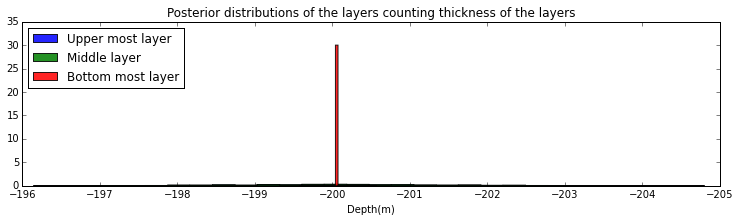

In [33]:
from IPython.core.pylabtools import figsize
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(True)

plt.hist(alpha_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Upper most layer", normed=True)
plt.hist(beta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Middle layer", normed=True)
plt.hist(gamma_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Bottom most layer", normed=True)


plt.gca().invert_xaxis()
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the layers counting thickness of the layers""")
#plt.ylim([0, 0.1])
#plt.xlim([0,-2000])
plt.xlabel("Depth(m)")

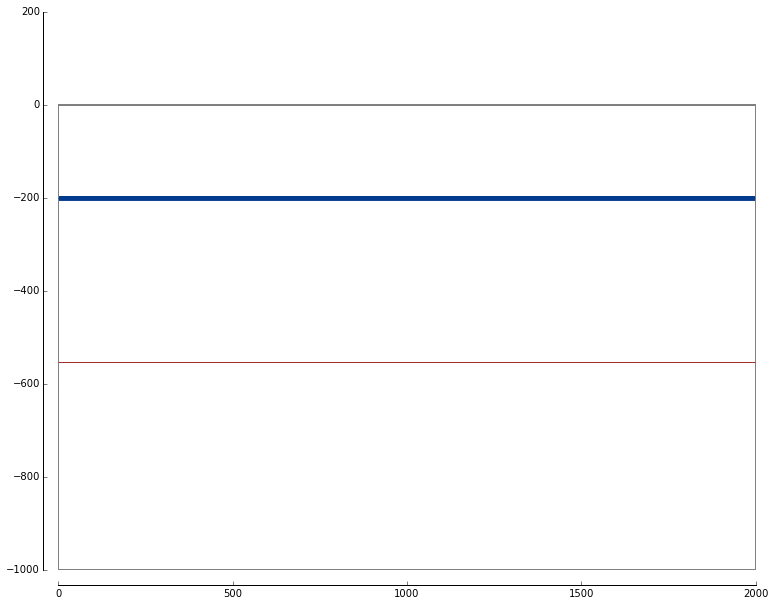

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([0,2000])
for alpha, beta, gamma in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (0,0.),
                                    'fault_w_dip' : 0,
                                    'fault_e_pos' : (0.,0.),
                                    'fault_e_dip' : 0.},
                        'layers' : {3 : {'w' :(250., -200.),
                                                 'c' : (1000., -400.),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., -400.),
                                                 'c' : (1000., -600.),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., -600.),
                                                 'c' : (1000., -800.),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : 0.000001,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = ax, plot_faults= False, plot_points= False, alpha = 0.3) # Need to make it transparent!!!
    


## Adding complexity

In [97]:
import daft

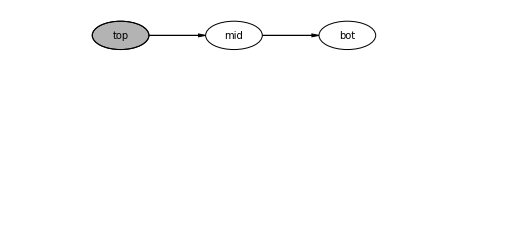

In [106]:
pgm = daft.PGM([9, 4], origin=[1, 0.5])
pgm.add_node(daft.Node('1', 'top', 3, 4, aspect=2, observed = True))
pgm.add_node(daft.Node('2', 'mid', 5, 4, aspect=2))
pgm.add_node(daft.Node('3', 'bot', 7, 4, aspect=2, observed=False))
pgm.add_edge('1', '2')
pgm.add_edge('2', '3')
#pgm.add_edge('s', 'w')
pgm.render()
#pgm.figure.savefig("sprinkler.png", dpi=500)

In [8]:
import pymc as pm
import numpy as np

# notice the`value` here. We explain why below.


# Stochastic stuff
alpha = pm.Normal("alpha", 0, 0.5, value= 5)
thickness_layer1 = pm.Normal("thickness_layer1", 280, 0.5, value = 200)
thickness_layer2 = pm.Normal("thickness_layer2", 120, 0.5, value = 100)
offset = pm.Normal("offset", 400, 0.09, value = 400  )
layer_dip = pm.Normal("layer_dip", 5, 0.05, value = 0)


# Should I change the distribution of this to force always the same direction


fault_e_dip = pm.Normal("fault_e_dip", -70, 0.0005)
fault_w_dip = pm.Normal("fault_w_dip", 70, 0.0005)

# Deterministic -> Constrain thickness

@pm.deterministic
def beta2(alpha = alpha, thickness_layer1 = thickness_layer1):
    return alpha - thickness_layer1

beta = pm.Normal('beta', beta2, 0.05, value= -500, observed= False)

@pm.deterministic
def gamma2(beta = beta, thickness_layer2 = thickness_layer2):
    return beta - thickness_layer2

gamma = pm.Normal("gamma", gamma2, 0.05, value = -600, observed = False)



model = pm.Model([alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip])

In [153]:
fault_e_dip.random()

AttributeError: 'numpy.float64' object has no attribute 'random'

In [154]:
samples = [s2.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

AttributeError: 'Potential' object has no attribute 'random'

In [9]:
mcmc = pm.MCMC(model)
mcmc.sample(11000, 10000, 1)

 [-----------------100%-----------------] 11000 of 11000 complete in 2.7 sec

In [10]:
gamma_samples, gamma_samples_all = mcmc.trace('gamma')[:9], mcmc.trace('gamma')[:]
alpha_samples, alpha_samples_all = mcmc.trace('alpha')[:9], mcmc.trace("alpha")[:]
beta_samples, beta_samples_all = mcmc.trace('beta')[:9], mcmc.trace("beta")[:]
offset_samples, offset_samples_all = mcmc.trace("offset")[:9], mcmc.trace("offset")[:]
layer_dip =mcmc.trace("layer_dip")[:9]
fault_e_dip = mcmc.trace("fault_e_dip")[:9]
fault_w_dip = mcmc.trace("fault_w_dip")[:9]

parameters = zip(alpha_samples, beta_samples, gamma_samples, offset_samples, layer_dip, fault_e_dip, fault_w_dip)
parameters_all = zip(alpha_samples_all, beta_samples_all, gamma_samples_all, offset_samples_all)

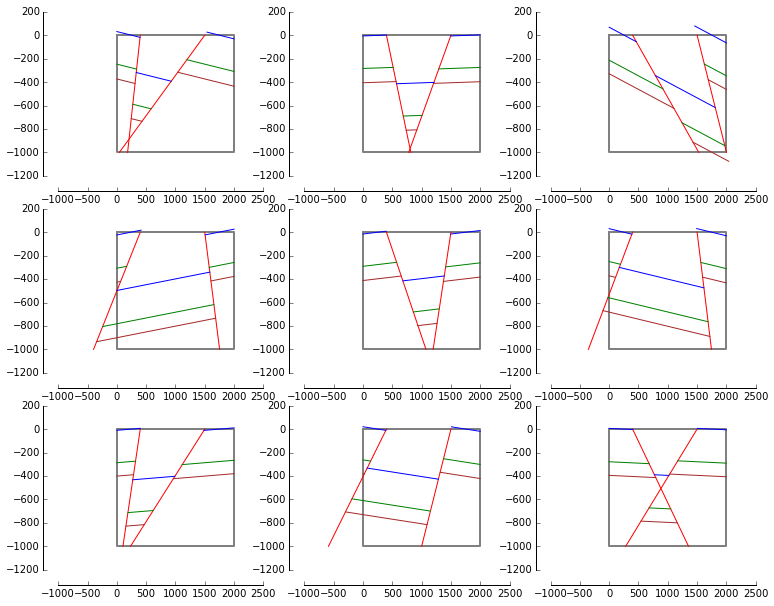

In [16]:
figsize(12.5, 10)
fig = plt.figure()
i = 0

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
for alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip  in parameters:
   # ax = fig.add_subplot(111)
    plot_figure(alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip, axs[i- 3*(i/3),i/3])
    i += 1
  

    

In [13]:
def plot_figure(alpha, beta, gamma, offset, layer_dip, fault_e_dip, fault_w_dip, axe_position):
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    
    model_parameters = {'faults' : {'fault_w_pos' : (400.,0.),
                                'fault_w_dip' : fault_w_dip,
                                'fault_e_pos' : (1500.,0.),
                                'fault_e_dip' : fault_e_dip},
                        'layers' : {3 : {'w' :(250., alpha),
                                                 'c' : (1000., alpha - offset),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., beta),
                                                 'c' : (1000., beta-offset),
                                                 'e' : (1750., beta)},
                                    1 : {'w' :(250., gamma),
                                                 'c' : (1000., gamma - offset),
                                                 'e' : (1750., gamma)}},
                        'layer_dip' : layer_dip,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    GM.plot_model(ax = axe_position, plot_faults= True, plot_points= False, alpha = 0.3) # Need to make it transparent!!! 
    
    

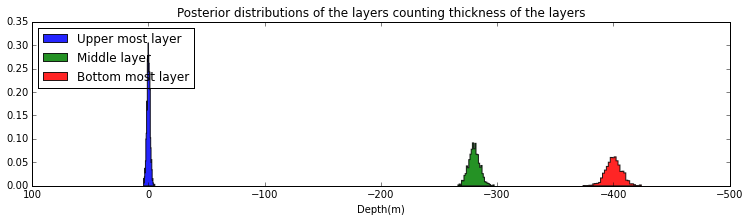

In [17]:
#def plot_histogram(alpha_samples_all, beta_samples_all, gamma_samples_all):

figsize(12.5, 10)
    # histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(True)

plt.hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=0.85,
             label="Upper most layer", normed=True)
plt.hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=0.85,
             label="Middle layer", normed=True)
plt.hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=0.85,
             label="Bottom most layer", normed=True)


plt.gca().invert_xaxis()
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the layers counting thickness of the layers""")
    #plt.ylim([0, 0.1])
plt.xlabel("Depth(m)")

####Some rubbish

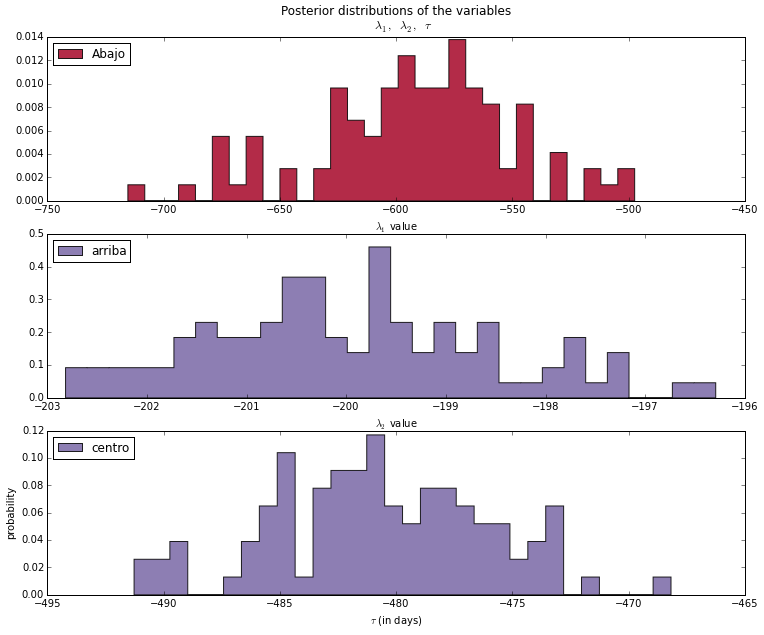

In [106]:
from IPython.core.pylabtools import figsize
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(True)

plt.hist(gamma_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Abajo", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
#plt.ylim([0, 0.1])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(True)
plt.hist(alpha_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="arriba", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
#plt.ylim([0, 0.6])
plt.xlabel("$\lambda_2$ value")

ax = plt.subplot(313)
ax.set_autoscaley_on(True)
plt.hist(beta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="centro", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
#plt.ylim([0, 0.3])
plt.xlabel("$\lambda_2$ value")

plt.legend(loc="upper left")
#plt.ylim([0, .2])
#plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

In [86]:
samples = [beta2.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

AttributeError: 'Deterministic' object has no attribute 'random'

In [93]:
# Mysterious code to be explained in Chapter 3.
mcmc = pm.MCMC(model)
mcmc.sample(10100, 10000, 1)

 [-----------------100%-----------------] 10100 of 10100 complete in 1.1 sec

In [36]:
print gamma_samples, len(gamma_samples)

[-629.5719962  -602.55554264 -545.98347171 -601.74937064 -571.26381994
 -600.73423321 -595.25252647 -672.19602577 -652.43945107 -561.14631511
 -539.53083385 -578.73888842 -599.7079749  -604.57127787 -550.95192153
 -589.06222837 -619.78406258 -624.12299824 -526.69772226 -578.26763229
 -614.71044631 -563.57944672 -548.14032595 -638.66351429 -578.07366369
 -575.89625693 -580.80030091 -569.49662705 -595.77374761 -599.84980202
 -549.72190124 -584.37734143 -605.91695008 -604.1543282  -595.85660444
 -687.49227664 -594.94875395 -587.35495739 -562.56837473 -677.45636643
 -600.0669968  -662.93302961 -590.02409243 -595.6016128  -594.70945399
 -545.99215426 -585.26775546 -643.88494453 -631.76314873 -558.87332491
 -651.12671247 -632.56623586 -582.50946588 -625.73529658 -605.25567099
 -648.99675429 -600.21066861 -614.5313418  -574.04743581 -618.46112213
 -528.18789639 -594.77576807 -631.62020127 -531.20822059 -635.77709379
 -597.04913589 -641.29709307 -576.54272255 -560.04060677 -613.53948467
 -598.

In [96]:
parameters = zip(alpha_samples, beta_samples, gamma_samples)

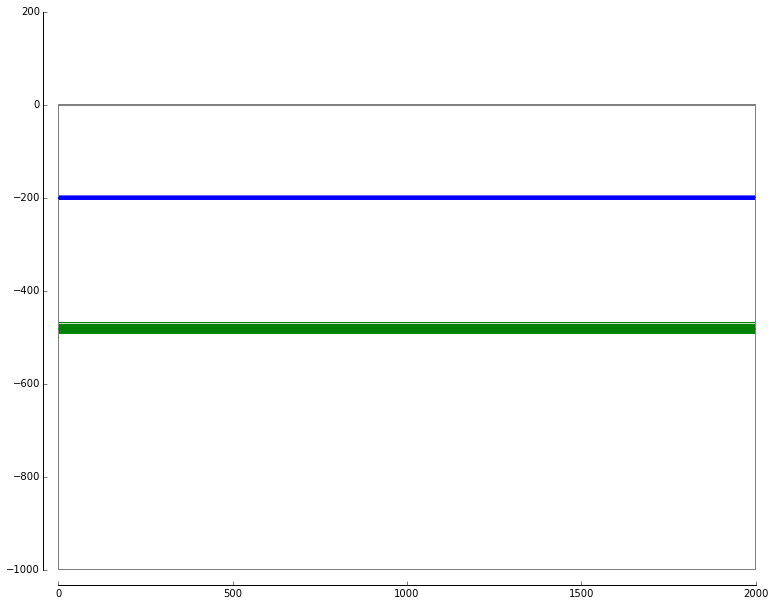

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([0,2000])
for alpha, beta, gamma in parameters:
    #print alpha, beta, gamma
    model_parameters = {'faults' : {'fault_w_pos' : (0.,0.),
                                    'fault_w_dip' : 0,
                                    'fault_e_pos' : (0.,0.),
                                    'fault_e_dip' : 0.},
                        'layers' : {3 : {'w' :(250., -200),
                                                 'c' : (1000., -200),
                                                 'e' : (1750., alpha)},
                                    2 : {'w' :(250., -500),
                                                 'c' : (1000., -500),
                                                 'e' : (1750., beta)}
                                 },
                        'layer_dip' : 0.00001,
                        'layer_colors' : {1 : 'Brown', 2 : 'g', 3 : 'b'},
                        'width' : 2000., # [m]
                        'height' : 1000. # [m]
                        }
    GM = gs.GrabenModel(model_parameters)
    
    GM.plot_model(ax = ax, plot_faults= False, plot_points= False)

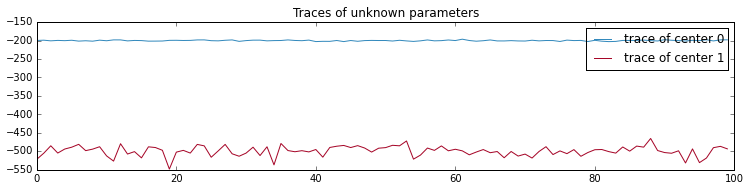

In [38]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1


# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] 


plt.plot(alpha_samples, label="trace of center 0", c=colors[0], lw=lw)
plt.plot(beta_samples, label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)


#plt.ylim(0, 1)
plt.legend()


In [89]:
print "I am fucked"

I am fucked


(array([  3.18045430e-05,   3.18045430e-05,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.18045430e-05,
          3.18045430e-05,   1.27218172e-04,   6.36090860e-05,
          9.54136291e-05,   2.54436344e-04,   5.08872688e-04,
          4.45263602e-04,   5.40677231e-04,   6.36090860e-04,
          1.17676809e-03,   2.00368621e-03,   2.03549075e-03,
          2.22631801e-03,   3.30767247e-03,   4.92970417e-03,
          4.73887691e-03,   6.74256312e-03,   7.82391758e-03,
          9.25512202e-03,   1.18630945e-02,   1.20221173e-02,
          1.41212171e-02,   1.61249033e-02,   1.96870121e-02,
          1.98778394e-02,   2.18497211e-02,   2.23585937e-02,
          2.46485208e-02,   2.69066434e-02,   2.74473206e-02,
          2.95146159e-02,   3.00552932e-02,   2.81470206e-02,
          2.77653661e-02,   2.59843116e-02,   2.64295753e-02,
          2.43622800e-02,   2.38534073e-02,   2.09909984e-02,
          1.90827258e-02,   1.73016714e-02,   1.56478352e-02,
        

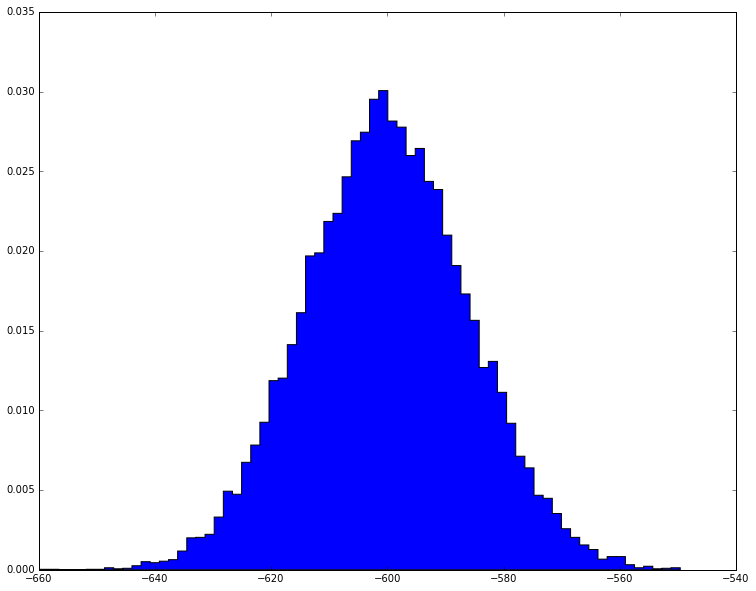

In [67]:
samples = [gamma.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

In [ ]:
observation = pm.("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [17]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
import numpy as np
import pymc as pm


0
(-2, 0, 3) 0
-2 0.7 #348ABD
0 1 #A60628
3 2.8 #7A68A6


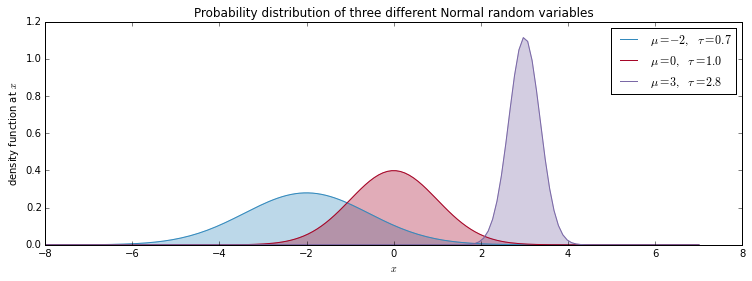

In [26]:
import scipy.stats as stats
mu = 0
_mu = 0
nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
print _mu
parameters = zip(mu, tau, colors)
print mu, _mu

for _mu, _tau, _color in parameters:
    print _mu, _tau, _color
    plt.plot(x, nor.pdf(x, _mu, scale=1. / _tau),   # Probability density distribution
             label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1. / _tau), color=_color,
                     alpha=.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title("Probability distribution of three different Normal random \
variables");

ValueError: x has only one data point. bins or range kwarg must be given

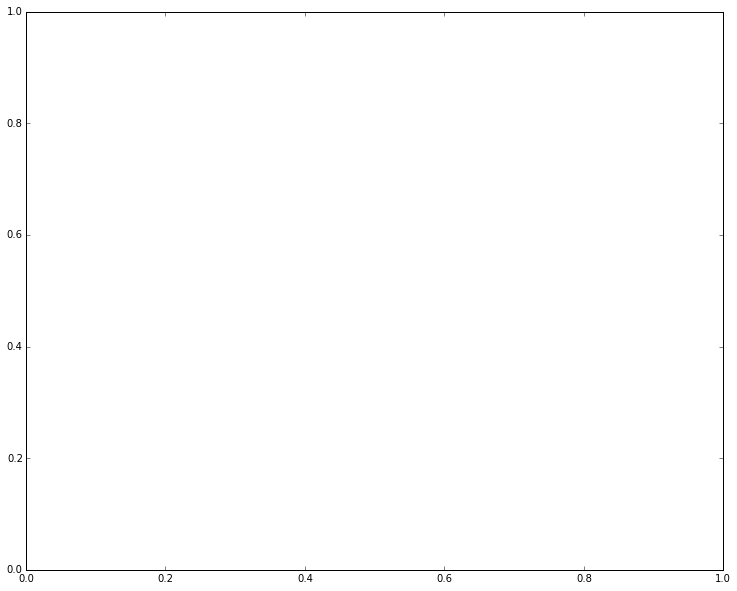

In [56]:
plt.hist(gamma, bins=5, normed=True, histtype="stepfilled")

In [1]:
import PyAstronomy as pa

AttributeError: 'module' object has no attribute 'funcFit'